In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, UpSampling2D

In [ ]:
input_shape = (256, 256, 3)
kerSize = 3

In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/mnt/s/Proyects/dataset/train/outdoor",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training"
)

In [ ]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/mnt/s/Proyects/dataset/val",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation"
)

In [ ]:
model = tf.keras.Sequential()

# Encoder
model.add(Conv2D(32, kernel_size=3, strides=2, padding='same',input_shape=input_shape))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv2D(64, kernel_size=3, strides=2, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv2D(128, kernel_size=3, strides=2, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv2D(256, kernel_size=3, strides=2, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())

# Decoder
model.add(Conv2D(256, kernel_size=3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(128, kernel_size=3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(64, kernel_size=3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(ReLU())
model.add(Conv2D(1, kernel_size=3, strides=1, padding='same', activation='sigmoid'))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mean_squared_error')

In [ ]:
model.fit(train_data, epochs=100, validation_data=val_data)

In [50]:
import tensorflow as tf
import cv2
import numpy as np

# Cargar la imagen
img = cv2.imread("/mnt/s/Proyects/dataset/val/outdoor/scene_00022/scan_00193/00022_00193_outdoor_000_020.png")

# Escalar la imagen
img = cv2.resize(img, (256, 256))

# Normalizar la imagen
img = np.float32(img) / 255.0

# Agregar una dimensión adicional para representar el lote (batch)
img = np.expand_dims(img, axis=0)
img = np.expand_dims(img, axis=-1)

# Cargar el modelo entrenado
model = tf.keras.models.load_model('model2.h5')

# Realizar la predicción de profundidad
depth = model.predict(img)

# Imprimir la profundidad predicha
print(depth)


1/1 [==============================] - 0s 110ms/step
[[[[0.9962069 ]
   [0.99943143]
   [0.99970514]
   ...
   [0.9996489 ]
   [0.99973613]
   [0.9977763 ]]

  [[0.99940693]
   [0.9999218 ]
   [0.9999311 ]
   ...
   [0.99989796]
   [0.9999424 ]
   [0.99952173]]

  [[0.99958867]
   [0.99990296]
   [0.99987674]
   ...
   [0.99987173]
   [0.99989665]
   [0.9996567 ]]

  ...

  [[0.99974006]
   [0.999933  ]
   [0.99989533]
   ...
   [0.9998965 ]
   [0.9999201 ]
   [0.99969673]]

  [[0.9997762 ]
   [0.9999701 ]
   [0.9999366 ]
   ...
   [0.99995744]
   [0.999956  ]
   [0.99976665]]

  [[0.9973079 ]
   [0.99971944]
   [0.999529  ]
   ...
   [0.99963415]
   [0.9994777 ]
   [0.9968527 ]]]]


In [51]:
# print(len(depth))
# print(len(depth[0]))
# print(len(depth[0][0]))
# print(len(depth[0][0][0]))
# print(depth[0][0][0][0])

for i in range(128):
    for j in range(128):
        depth[0][i][j][0] = depth[0][i][j][0]*255

In [52]:

new_pic = np.reshape(depth, (128, 128))

# print(new_pic)

# print(len(new_pic))
# print(len(new_pic[0]))
# print(len(new_pic[0][0]))
# print(len(new_pic[0][0][0]))
# print(new_pic[0][0][0][0])

# for i in range(128):
#     for j in range(128):
#         new_pic[i][j][0] = depth[0][i][j][0]



In [53]:
print(new_pic)

[[254.03276 254.85501 254.9248  ... 254.91048 254.93271 254.43297]
 [254.84877 254.98006 254.98244 ... 254.97398 254.98532 254.87804]
 [254.89511 254.97525 254.96857 ... 254.96729 254.97365 254.91245]
 ...
 [254.93372 254.98291 254.97331 ... 254.97362 254.97963 254.92267]
 [254.94293 254.99237 254.98383 ... 254.98915 254.98878 254.94049]
 [254.3135  254.92845 254.8799  ... 254.90671 254.8668  254.19743]]


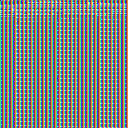

In [54]:
from PIL import Image
import numpy as np

img = Image.fromarray(new_pic, 'RGB')
img.save('my.png')
img.show()